#  <font color='#FFE15D'><b>💎 Week 2: Linear Regression with torch API</b></font>


## 🟪 **Increasing the output font size in Colab cells**

In [ ]:
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style>
    body {
      font-size: 30px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

In [ ]:
a = 3
a

3

## 🟥 **Step 0: Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch

In [2]:
torch.__version__

'2.1.2'

## 🟥 **Step 1: Dataset**

https://www.kaggle.com/code/ybifoundation/simple-linear-regression

<table border="1" align="left">
  <tr>
    <th align="center">Experience Years</th>
    <th align="center">Salary</th>
  </tr>
  <tr>
    <td align="center">1.1</td>
    <td align="center">39343</td>
  </tr>
  <tr>
    <td align="center">1.2</td>
    <td align="center">42774</td>
  </tr>
  <tr>
    <td align="center">1.3</td>
    <td align="center">46205</td>
  </tr>
  <tr>
    <td align="center">...</td>
    <td align="center">...</td>
  </tr>
  <tr>
    <td align="center">10.3</td>
    <td align="center">122391</td>
  </tr>
  <tr>
    <td align="center">10.5</td>
    <td align="center">121872</td>
  </tr>
</table>


In [4]:
salary = pd.read_csv('./data/Week2_Salary Data.csv')
salary

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


In [5]:
X = salary['Experience Years'].values
y = salary['Salary'].values
X, y

(array([ 1.1,  1.2,  1.3,  1.5,  2. ,  2.2,  2.5,  2.9,  3. ,  3.2,  3.2,
         3.5,  3.7,  3.8,  3.9,  4. ,  4. ,  4.1,  4.3,  4.5,  4.7,  4.9,
         5.1,  5.3,  5.5,  5.9,  6. ,  6.2,  6.5,  6.8,  7.1,  7.9,  8.2,
         8.5,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 39343,  42774,  46205,  37731,  43525,  39891,  48266,  56642,
         60150,  54445,  64445,  60000,  57189,  60200,  63218,  55794,
         56957,  57081,  59095,  61111,  64500,  67938,  66029,  83088,
         82200,  81363,  93940,  91000,  90000,  91738,  98273, 101302,
        113812, 111620, 109431, 105582, 116969, 112635, 122391, 121872]))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28,), (28,), (12,), (12,))

In [7]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28, 1), (28, 1), (12, 1), (12, 1))

In [8]:
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)

In [9]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)

In [10]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [11]:
y_scaler.inverse_transform(y_test)

array([[ 60000.],
       [ 91738.],
       [ 39891.],
       [112635.],
       [109431.],
       [ 67938.],
       [113812.],
       [ 82200.],
       [ 46205.],
       [ 43525.],
       [105582.],
       [ 98273.]])

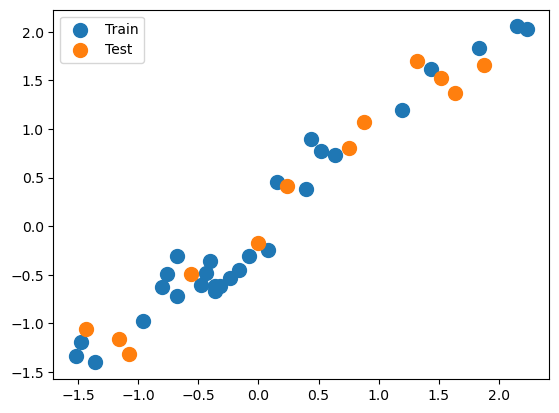

In [12]:
plt.scatter(X_train, y_train, s=100)
plt.scatter(X_test, y_test, s=100)

plt.legend(['Train', 'Test']);

In [13]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([28, 1]),
 torch.Size([28, 1]),
 torch.Size([12, 1]),
 torch.Size([12, 1]))

## 🟥 **Step 2: Model**

### 🟧 **Functional**

In [14]:
def linear_regression(x, theta0, theta1):
  y_hat = x * theta1 + theta0
  return y_hat

In [15]:
theta0 = torch.randn(1)
theta1 = torch.randn(1)
print(theta0, theta1)

y_hat = linear_regression(X_train, theta0, theta1)
y_hat.shape

tensor([0.3230]) tensor([-0.7613])


torch.Size([28, 1])

In [16]:
linear_regression(1, 2, -2)

0

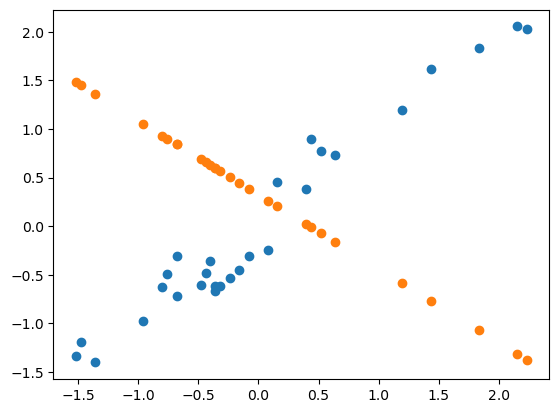

In [17]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_hat)

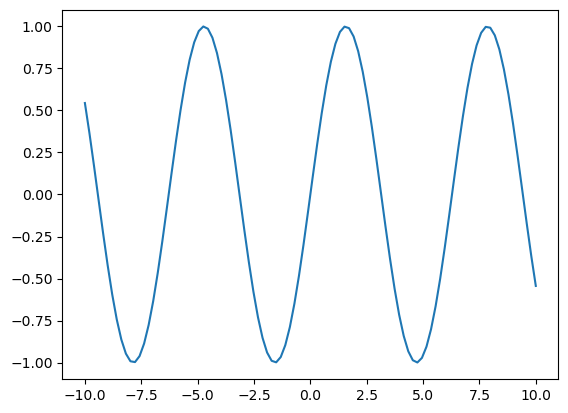

In [18]:
Xr = np.linspace(-10, 10, 100)
yr = np.sin(Xr)

plt.plot(Xr, yr)

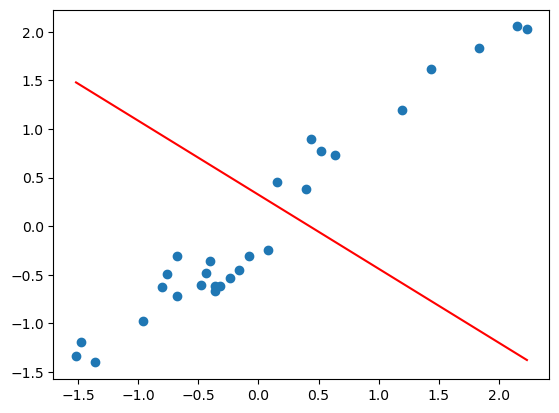

In [19]:
Xr = torch.linspace(X_train.min(), X_train.max(), 100).unsqueeze(1)
y_hat = linear_regression(Xr, theta0, theta1)

plt.scatter(X_train, y_train)
plt.plot(Xr, y_hat, color='red')

### 🟧 **OO**

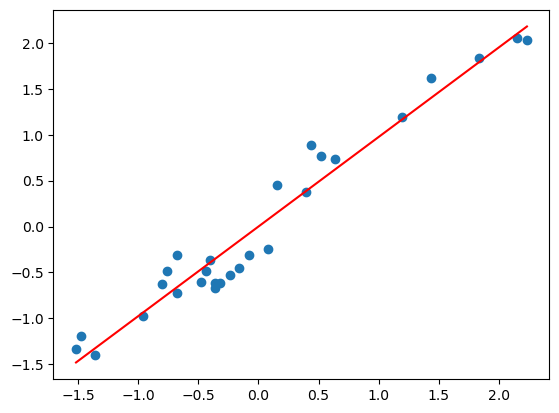

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(Xr)

plt.scatter(X_train, y_train)
plt.plot(Xr, y_hat, color='red')

In [21]:
class LinearRegression:

  def __init__(self):
    self.theta0 = torch.randn(1)
    self.theta1 = torch.randn(1)

  def __call__(self, x):
    y_hat = x * self.theta1 + self.theta0
    return y_hat

  def __repr__(self):
    return "Linear Regression by Howsam AI"

In [22]:
model = LinearRegression()
model.theta0, model.theta1

(tensor([-1.0666]), tensor([-1.4869]))

In [23]:
model(X_train).shape

torch.Size([28, 1])

## 🟥 **Step 3: Loss**

In [24]:
y_hat = model(X_train)
y_hat.shape

torch.Size([28, 1])

In [25]:
def mse(y_hat, y):
  return torch.mean((y_hat - y)**2)

In [26]:
loss = mse(y_hat, y_train)
loss

tensor(7.2487)

In [ ]:
loss = (x *theta1 + theta0 - y) ** 2
# z = (x+y)**2

In [28]:
theta0 = 0
theta1 = torch.linspace(-10, 10, 100)

loss = torch.zeros(len(theta1))

for i, t1 in enumerate(theta1):
  y_hat = linear_regression(X_train, theta0, theta1=t1)
  loss[i] = mse(y_hat, y_train)

loss.shape

torch.Size([100])

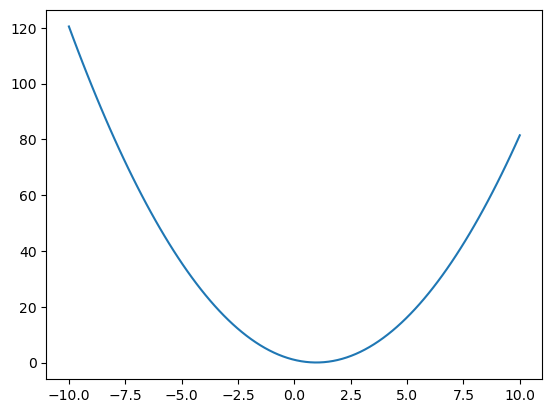

In [29]:
plt.plot(theta1, loss)

In [30]:
idx = torch.argmin(loss)
theta1[idx]

tensor(0.9091)

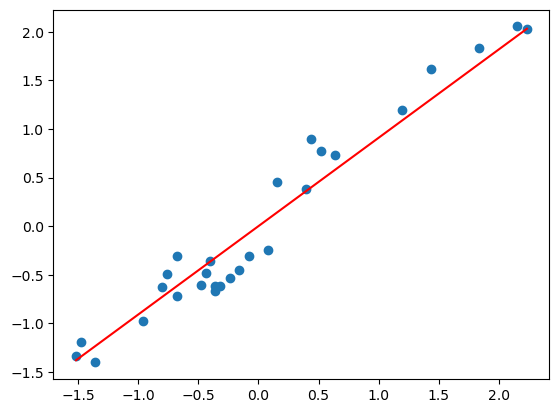

In [31]:
plt.scatter(X_train, y_train)

y_hat = linear_regression(Xr, theta0=0, theta1=theta1[idx])
plt.plot(Xr, y_hat, color='r')

### 🟧 **Loss landscape**

/home/yousef/miniconda3/envs/ml/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400366987/work/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


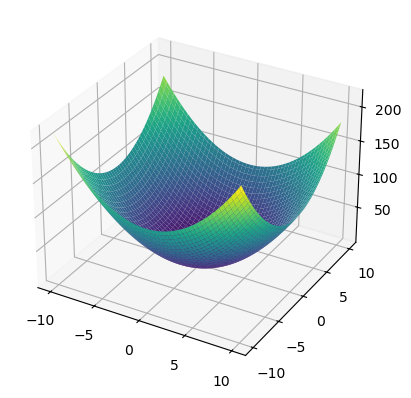

In [32]:
theta0_vals = torch.linspace(-10, 10, 100)
theta1_vals = torch.linspace(-10, 10, 100)
theta0, theta1 = torch.meshgrid(theta0_vals, theta1_vals)

loss = torch.zeros_like(theta0)

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t0 = theta0_vals[i]
        t1 = theta1_vals[j]
        loss[i, j] = torch.mean((t0 + t1 * X_train - y_train)** 2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0, theta1, loss, cmap='viridis');

<a list of 12 text.Text objects>

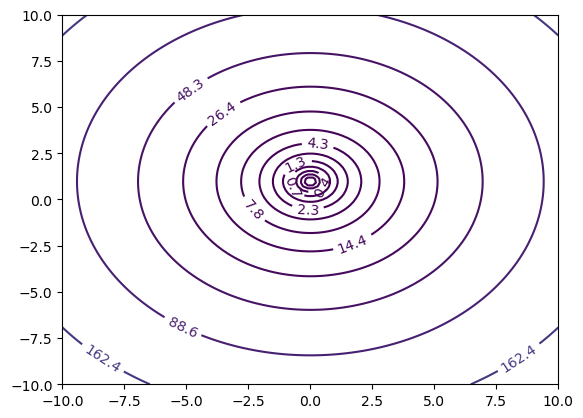

In [33]:
fig = plt.figure()
CS = plt.contour(theta0, theta1, loss, levels=torch.logspace(-2, 3, 20))
plt.clabel(CS, inline=1, fontsize=10)

In [34]:
idx = torch.argmin(loss.flatten())
theta0.flatten()[idx], theta1.flatten()[idx]

(tensor(0.1010), tensor(0.9091))

## 🟥 **Step 4: Optimizer**

In [35]:
def gradient_descent(x, y, y_hat, eta, theta0, theta1):
  # gradient
  error = y_hat - y
  grad_theta0 = 2*torch.mean(error)
  grad_theta1 = 2*torch.mean(x*error)
  # update
  theta0 -= eta * grad_theta0
  theta1 -= eta * grad_theta1
  return theta0, theta1

In [36]:
y_hat = model(X_train)
loss = mse(y_hat, y_train)
print(loss)
gradient_descent(X_train, y_train, y_hat, 0.5, model.theta0, model.theta1)

tensor(7.2487)


(tensor([0.]), tensor([0.9751]))

In [37]:
def calc_gradient(x, y, y_hat):
  error = y_hat - y
  grad_theta0 = 2*torch.mean(error)
  grad_theta1 = 2*torch.mean(x*error)
  return grad_theta0, grad_theta1

In [38]:
def update(theta0, theta1, eta, grad_theta0, grad_theta1):
  theta0 -= eta * grad_theta0
  theta1 -= eta * grad_theta1
  return theta0, theta1

In [39]:
y_hat = model(X_train)

loss = mse(y_hat, y_train)
print(loss)

grad_theta0, grad_theta1 = calc_gradient(X_train, y_train, y_hat)
print(grad_theta0, grad_theta1)

model.theta0, model.theta1 = update(model.theta0, model.theta1, 0.5, grad_theta0, grad_theta1)
model.theta0, model.theta1

tensor(0.0491)
tensor(-2.1287e-08) tensor(-2.3948e-07)


(tensor([1.0644e-08]), tensor([0.9751]))

## 🟥 **Step 5: Train Lꝏp**

In [40]:
theta0 = torch.randn(1)
theta1 = torch.randn(1)
print(theta0, theta1)

eta = 0.1
N = 100

tensor([-0.8813]) tensor([-1.6960])


In [41]:
for iter in range(N):
  # model
  y_hat = linear_regression(X_train, theta0, theta1)

  # loss
  loss = mse(y_hat, y_train)

  # gradient
  grad_theta0, grad_theta1 = calc_gradient(X_train, y_train, y_hat)

  # update
  theta0, theta1 = update(theta0, theta1, eta, grad_theta0, grad_theta1)

  print(f'Iter: {iter}/{N} , Loss: {loss:.2f} , g_th0: {grad_theta0:.2f} , g_th1: {grad_theta1:.2f} , th0: {theta0.item():.2f} , th1: {theta1.item():.2f}')

Iter: 0/100 , Loss: 7.96 , g_th0: -1.76 , g_th1: -5.34 , th0: -0.71 , th1: -1.16
Iter: 1/100 , Loss: 5.11 , g_th0: -1.41 , g_th1: -4.27 , th0: -0.56 , th1: -0.73
Iter: 2/100 , Loss: 3.29 , g_th0: -1.13 , g_th1: -3.42 , th0: -0.45 , th1: -0.39
Iter: 3/100 , Loss: 2.12 , g_th0: -0.90 , g_th1: -2.74 , th0: -0.36 , th1: -0.12
Iter: 4/100 , Loss: 1.38 , g_th0: -0.72 , g_th1: -2.19 , th0: -0.29 , th1: 0.10
Iter: 5/100 , Loss: 0.90 , g_th0: -0.58 , g_th1: -1.75 , th0: -0.23 , th1: 0.27
Iter: 6/100 , Loss: 0.59 , g_th0: -0.46 , g_th1: -1.40 , th0: -0.18 , th1: 0.41
Iter: 7/100 , Loss: 0.40 , g_th0: -0.37 , g_th1: -1.12 , th0: -0.15 , th1: 0.53
Iter: 8/100 , Loss: 0.27 , g_th0: -0.30 , g_th1: -0.90 , th0: -0.12 , th1: 0.62
Iter: 9/100 , Loss: 0.19 , g_th0: -0.24 , g_th1: -0.72 , th0: -0.09 , th1: 0.69
Iter: 10/100 , Loss: 0.14 , g_th0: -0.19 , g_th1: -0.57 , th0: -0.08 , th1: 0.75
Iter: 11/100 , Loss: 0.11 , g_th0: -0.15 , g_th1: -0.46 , th0: -0.06 , th1: 0.79
Iter: 12/100 , Loss: 0.09 , g_th0:

## 🟥 **Step 6: Test**

In [42]:
theta0, theta1

(tensor([1.5487e-08]), tensor([0.9751]))

In [43]:
y_hat = linear_regression(X_test, theta0, theta1)
y_hat

tensor([[-5.4653e-01],
        [ 7.3844e-01],
        [-1.0527e+00],
        [ 1.8287e+00],
        [ 1.4783e+00],
        [-1.3906e-03],
        [ 1.2836e+00],
        [ 2.3224e-01],
        [-1.4032e+00],
        [-1.1306e+00],
        [ 1.5951e+00],
        [ 8.5525e-01]])

In [44]:
mse(y_hat, y_test)

tensor(0.0470)

In [45]:
y_scaler.inverse_transform(y_hat)

array([[ 58711.55652417],
       [ 90165.79919933],
       [ 46320.48932671],
       [116854.24836982],
       [108275.81947781],
       [ 72055.78041979],
       [103510.02597315],
       [ 77774.73382568],
       [ 37742.0575166 ],
       [ 44414.17309208],
       [111135.29674785],
       [ 93025.27646936]])

In [46]:
y_scaler.inverse_transform(y_test)

array([[ 60000.00022221],
       [ 91737.99928019],
       [ 39890.99884166],
       [112634.99965213],
       [109431.00029806],
       [ 67938.00006045],
       [113811.99907604],
       [ 82199.99975495],
       [ 46204.99984203],
       [ 43525.00006537],
       [105581.99959858],
       [ 98273.00082071]])

## 🟪 **Exercise: US Health Insurance Dataset**

https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset